In [12]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import json
from MCForecastTools import MCSimulation
import os
import requests
import alpaca_trade_api as tradeapi

from dotenv import load_dotenv



%matplotlib inline

In [13]:
# Reading Jim Cramer 1 week Covid returns
file_path=Path("./pandemic_stock_picks.csv")

cramer_index = pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True, nrows=8)
cramer_index=cramer_index.sort_index()



In [14]:
cramer_index.dropna(inplace=True)
cramer_index.set_index(pd.to_datetime(cramer_index["Unnamed: 0"]),inplace=True)
cramer_index.drop(columns="Unnamed: 0", inplace=True)

In [15]:

cramer_index = cramer_index.astype("float")
cramer_index.dtypes

AAPL      float64
AAPL.1    float64
AAPL.2    float64
AAPL.3    float64
AAPL.4    float64
           ...   
ZM        float64
ZM.1      float64
ZM.2      float64
ZM.3      float64
ZM.4      float64
Length: 100, dtype: object

In [16]:
cramer_returns = cramer_index[["AAPL.3","AMD.3","AMZN.3","ATVI.3","COST.3","CPB.3","DPZ.3","ETSY.3","FB.3","GOOG.3","MKC.3","NFLX.3","NVDA.3","OKTA.3","PEP.3","PLD.3","SHOP.3","TTWO.3","WING.3","ZM.3"]].pct_change()
cramer_returns.dropna(inplace=True)


In [17]:
cramer_returns.head()

,AAPL.3,AMD.3,AMZN.3,ATVI.3,COST.3,CPB.3,DPZ.3,ETSY.3,FB.3,GOOG.3,MKC.3,NFLX.3,NVDA.3,OKTA.3,PEP.3,PLD.3,SHOP.3,TTWO.3,WING.3,ZM.3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,


In [18]:
cramer_returns.index.names=["Date"]
cramer_index.index.names=["Date"]

In [8]:
cramer_returns.head()

,AAPL.3,AMD.3,AMZN.3,ATVI.3,COST.3,CPB.3,DPZ.3,ETSY.3,FB.3,GOOG.3,MKC.3,NFLX.3,NVDA.3,OKTA.3,PEP.3,PLD.3,SHOP.3,TTWO.3,WING.3,ZM.3
Date,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:title={'center':'Daily Cramer Returns'}, xlabel='Date'>

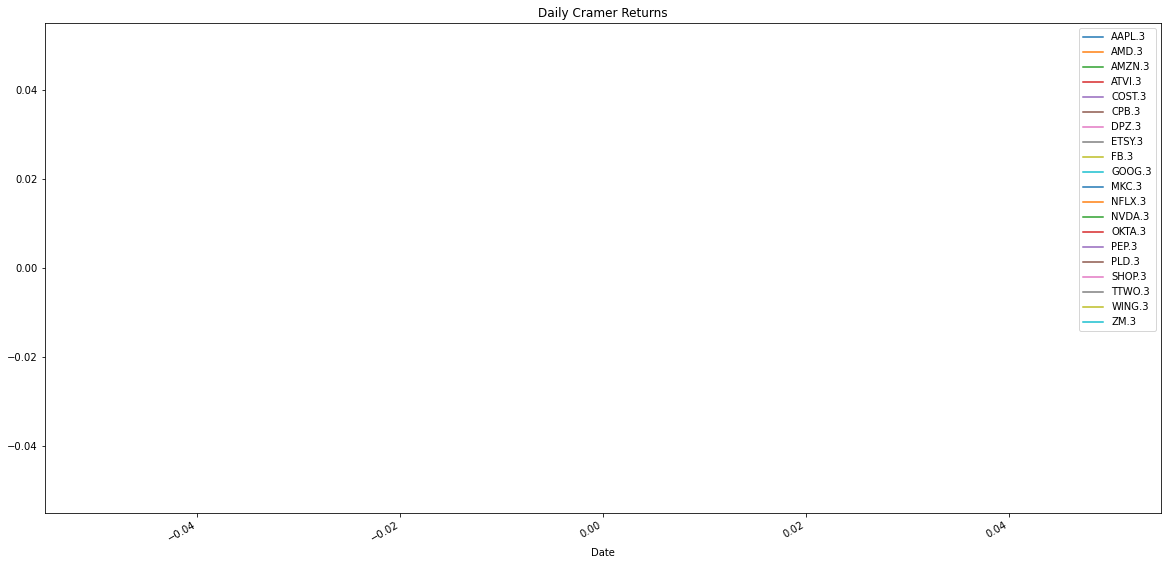

In [9]:
cramer_returns.plot(figsize=(20,10), title="Daily Cramer Returns")

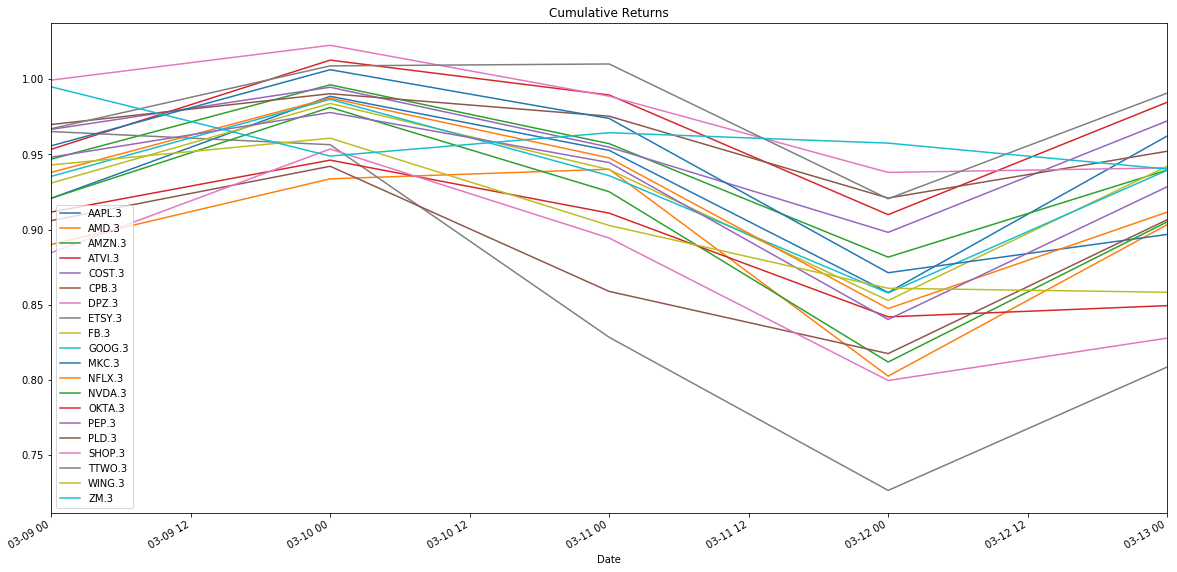

In [40]:
# Calculate cumulative returns of all portfolios
cramer_cumulative = (1 + cramer_returns).cumprod()

# Plot cumulative returns
cramer_cumulative.plot(figsize=(20, 10), title="Cumulative Returns")

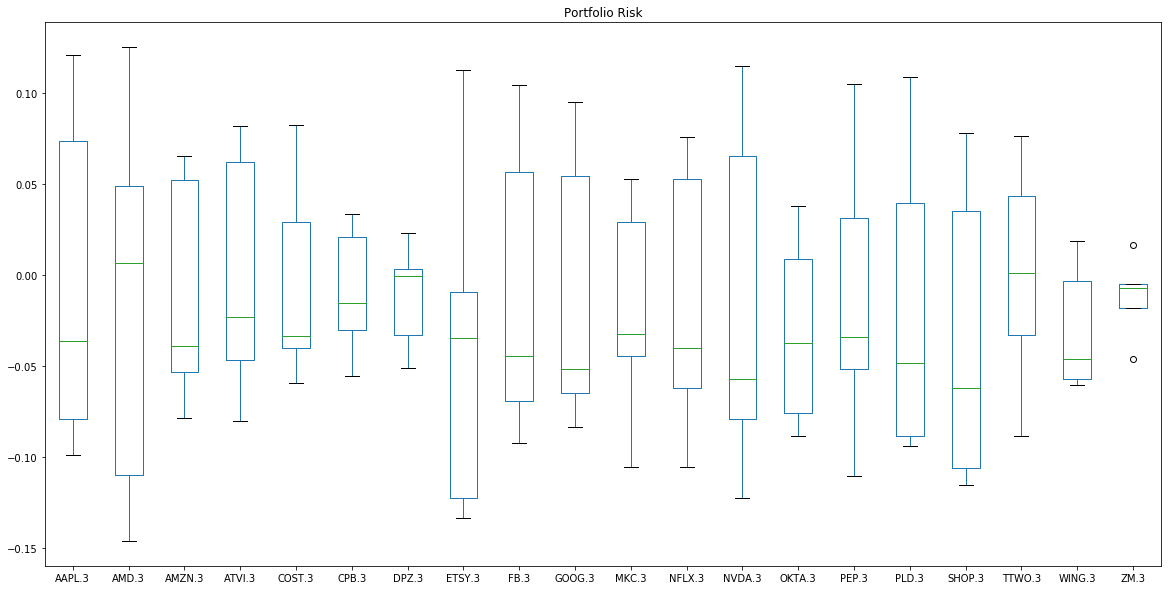

In [41]:
# Box plot to visually show risk
cramer_returns.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [42]:
#standard deviation
cramer_returns.std()


AAPL.3    0.096784
AMD.3     0.112425
AMZN.3    0.065297
ATVI.3    0.070293
COST.3    0.058704
CPB.3     0.036774
DPZ.3     0.029933
ETSY.3    0.099997
FB.3      0.085326
GOOG.3    0.079557
MKC.3     0.062775
NFLX.3    0.077280
NVDA.3    0.100940
OKTA.3    0.053988
PEP.3     0.082664
PLD.3     0.088125
SHOP.3    0.086474
TTWO.3    0.064527
WING.3    0.035456
ZM.3      0.022838
dtype: float64

In [ ]:

# Calculate covariance of all daily returns of Cramer vs. SP500
covariance = cramer_returns['cramer_returns'].cov(daily_returns['SP500'])
covariance


In [ ]:
# Calculate variance of all daily returns of MSFT vs. AAPL
variance = cramer_returns['cramer_returns'].var()
variance

In [ ]:
# Calculate beta of all daily returns of MSFT
cramer_beta = covariance / variance
cramer_beta

In [ ]:
#bargraph of time frames

In [11]:
#averagevolume for the week of each stock
cramer_volume = cramer_volume[["AAPL.4","AMD.4","AMZN.4","ATVI.4","COST.4","CPB.4","DPZ.4","ETSY.4","FB.4","GOOG.4","MKC.4","NFLX.4","NVDA.4","OKTA.4","PEP.4","PLD.4","SHOP.4","TTWO.4","WING.4","ZM.4"]].groupby.mean()
cramer_volume.dropna(inplace=True)

NameError: name 'cramer_volume' is not defined

In [1]:
#comparison to S&P500
file_path=Path("snp_data_5Y.csv")

snp_data = pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True, nrows=8)
snp_data=snp_data_index.sort_index()

NameError: name 'Path' is not defined

In [ ]:
#markdown file of discussion/analysis